<font color ='red'><h4><b>Credit Risk Scoring Project</h4><font>


We want to build a model that for each customer is going to calculate the credit risk based on certain conditions and then will tell use whether the customer will default or will pay the loan back. so a binary classification problem.<br>

Decision tree algorithm is like a rule based algorithm that if this then this and we will learn that how decision tree algorithm comes to know about these routes/rules <br>

We will see what happens if we put different or many more trees together we get the <font color = 'orange'> Random Forest Model</font> <br>

How to combine multiple trees together called <font color = 'orange'> Gradient Boosting</font> using a library called <font color = 'orange'>XGBoost</font> <br>

And finally selecting the best model.


<font color = 'red'><h4> <b>Data Cleaning and Preparation</h4></font>

🥽 Download the data from the given link.<br>
🥽Reformat categorical columns (status, home, marital, records, and job) by mapping with appropriate values.<br>
🥽Replace the maximum value of income, assests, and debt columns with NaNs.<br>
🥽Replace the NaNs in the dataframe with 0 (will be shown in the next lesson).<br>
🥽Extract only those rows in the column status who are either ok or default as value.<br>
🥽Split the data in a two-step process which finally leads to the distribution of 60% train, 20% validation, and 20% test sets with random seed to 11.<br>
🥽Prepare target variable status by converting it from categorical to binary, where 0 represents ok and 1 represents default.<br>
🥽Finally delete the target variable from the train/val/test dataframe.<br>

In [23]:
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [24]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv'

df =pd.read_csv(data)

df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [25]:
df.columns = df.columns.str.lower()

In [26]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [27]:
#The categorical variable are coded as numerical and that is not what we want to convert it into useful information so it is easier to see what is going on.
#For that we can use the map method in which we can pass a dictionary indicating what value represents what.

status_values = {
    1:'ok',
    2:'default',
    0:'unk'  #unknown
}

df.status = df.status.map(status_values)

In [28]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [29]:
#similarly we can do the same for other columns as well

home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)


In [30]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [31]:
# now lets look at the numerical columns

df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [32]:
# since the income assets and debt has the arbitrary number 99999999 as the max value that is absurd so we will replace it with nan 
# to achiever that we can use replace method with just works like map but only for one value

for c in ['assets','income','debt']:
    df[c]=df[c].replace(to_replace=df[c].max(),value=np.nan)
    
#printing out the new max values to check if have properly replaced the fake max values.
for c in ['assets','income','debt']:
    print(df[c].max())

300000.0
959.0
30000.0


In [33]:
# we also saw that the status column has unknown value in it and that is of no use to us we only need ok and default so lets remove that row

df.status.value_counts()

status
ok         3200
default    1254
unk           1
Name: count, dtype: int64

In [34]:
df = df[df.status!='unk'].reset_index(drop =True)

In [35]:
df

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4449,default,1,rent,60,39,married,no,fixed,69,92.0,0.0,0.0,900,1020
4450,ok,22,owner,60,46,married,no,fixed,60,75.0,3000.0,600.0,950,1263
4451,default,0,owner,24,37,married,no,partime,60,90.0,3500.0,0.0,500,963
4452,ok,0,rent,48,23,single,no,freelance,49,140.0,0.0,0.0,550,550


In [36]:
# lets split the data frame in train test and validation
from sklearn.model_selection import train_test_split

df_full_train,df_test =train_test_split(df,test_size=0.2,random_state=11)
df_train,df_val = train_test_split(df_full_train,test_size=0.25,random_state=11)

In [37]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [40]:
#Lets convert the status column to back to numerics but not the previous ones i.e 1,2 it should be 0,1

y_train = (df_train.status=='default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

In [41]:
# now let remove the target variable from the train validation and test dataset

del df_train['status']
del df_val['status']
del df_test['status']

In [42]:
df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
1,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
4,5,owner,36,46,married,no,freelance,60,100.0,4000.0,0.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,18,private,36,45,married,no,fixed,45,220.0,20000.0,0.0,800,1600
2668,7,private,60,29,married,no,fixed,60,51.0,3500.0,500.0,1000,1290
2669,1,parents,24,19,single,no,fixed,35,28.0,0.0,0.0,400,600
2670,15,owner,48,43,married,no,freelance,60,100.0,18000.0,0.0,2500,2976


<font color = 'red'><h4><b>Decision Tree </b></h4></font> <br>

🐳 How a decision tree looks like <br>
🐳 Training a decision tree<br>
🐳 Overfitting  <br>
🐳 Controlling the size of the tree <br>

Decision tree is simple rule based algorithm just like this image below <br>
<br>
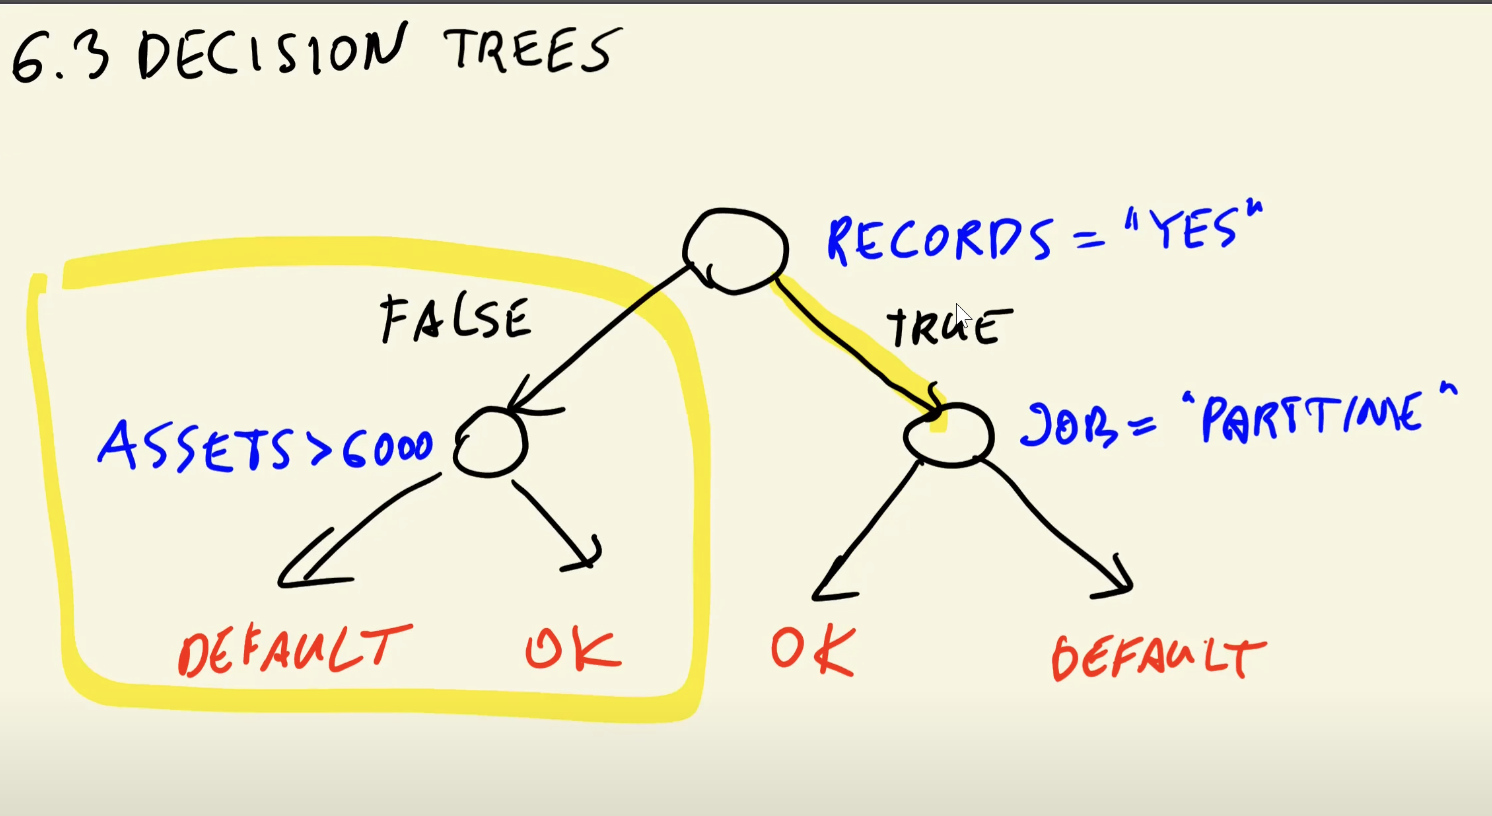 <br>

We can implement the same using the if else rule like below


In [44]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else :
            return 'ok'
    else:
        if client['assets']>6000:
            return 'ok'
        else:
            return 'default'
    endif

In [49]:
xi = df_train.iloc[0].to_dict()

In [50]:
assess_risk(xi)

'ok'

Here we encoded these rules manually but these rules can be learned from the data and we can do that with the help of scikit learn
